# K-Vecinos más cercanos

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [120]:
url = 'https://raw.githubusercontent.com/CodigoMaquina/code/main/datos/creditos.csv'
df=pd.read_csv(url)

In [121]:
df['Prestamos']=df['cumplio'].replace([0, 1],['No', 'Si'])
df.head()

,edad,credito,cumplio,Prestamos
0,18,363112,0,No
1,19,477965,1,Si
2,20,239072,0,No
3,22,195265,0,No
4,22,482174,0,No


In [122]:
lookup_prestamo_name = dict(zip(df.cumplio.unique(), df.Prestamos.unique()))
lookup_prestamo_name

{0: 'No', 1: 'Si'}

Este es un ejercicio academico. En el DataFrame vamos a tener la edad de clientes que piden un creito al banco y adicionalmente se especifica si dicho cliente pago o no pago la deuda. Para esto, vamos a hacer primero filtros por clientes buenos y clientes malos.

In [123]:
Buenos = df[df['cumplio']==1]
Malos = df[df['cumplio']==0]

A continuación vamos a generar una visualización de los clientes que si agaron y de los que no

<function matplotlib.pyplot.show(close=None, block=None)>

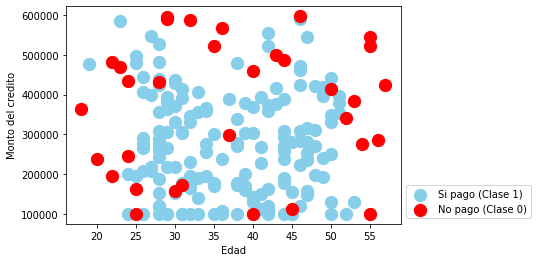

In [124]:
plt.scatter(Buenos['edad'], Buenos['credito'], marker = 'o', s=150, color = 'skyblue', label = 'Si pago (Clase 1)')
plt.scatter(Malos['edad'], Malos['credito'], marker = 'o', s=150, color = 'red', label = 'No pago (Clase 0)')
plt.ylabel('Monto del credito')
plt.xlabel('Edad')
plt.legend(bbox_to_anchor = (1, 0.2))
plt.show

Ahora vamos a separar nuestros datos en dos partes, unos seran los datos de entrenamiento y los otros con los que probaremos el modelo.
Adicionalmente hacemos un gráfico que nos permita ojear como son las distribuciones de los datos.

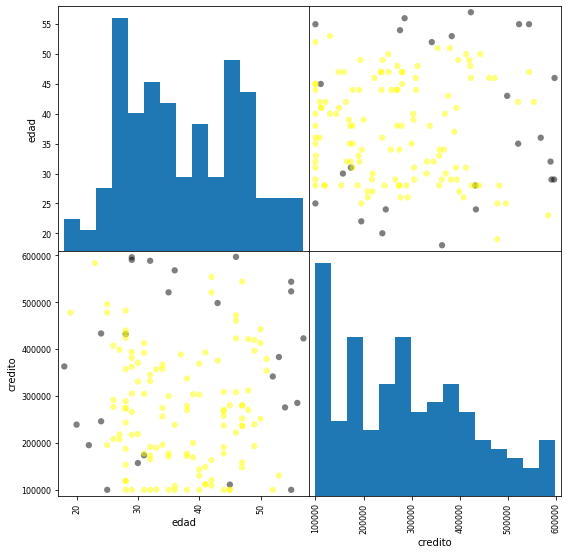

In [125]:
 # plotting a scatter matrix
from matplotlib import cm

# default is 75% / 25% train-test split
X = df[['edad', 'credito']]
y = df['cumplio']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

# Creamos el objeto clasificador

In [126]:
knn = KNeighborsClassifier(n_neighbors = 3)

# Entrenar al clasificador (ajustar el estimador) usando los datos de entrenamiento

In [127]:
knn.fit(X_train.values, y_train)

KNeighborsClassifier(n_neighbors=3)

# Estimamos la precisión del clasificador en datos futuros, utilizando los datos de prueba

In [128]:
knn.score(X_test.values, y_test)

0.8

# Usamos el modelo clasificador k-NN entrenado para clasificar objetos nuevos nunca antes vistos

In [129]:
Edad = 53
Monto =  3500000
Solicitante = [[Edad, Monto]]


In [130]:
pred = knn.predict(Solicitante)
lookup_prestamo_name[pred[0]]

'No'

# ¿Qué tan sensible es la precisión de la clasificación k-NN a la elección del parámetro 'k'?

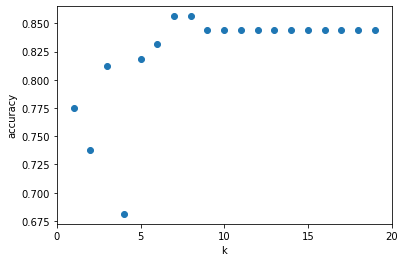

In [154]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);


# ¿Qué tan sensible es la precisión de la clasificación k-NN a la proporción de división del tren/prueba?

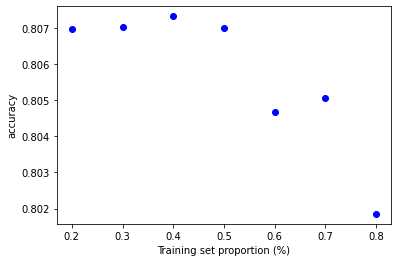

In [156]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 3)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');